<a href="https://colab.research.google.com/github/MyriamBA02/TP_Colab/blob/main/BTC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.parse import urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
ua = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62"}
website = 'https://www.coingecko.com/en/coins/bitcoin/historical_data?start_date=2013-09-24&end_date=2022-10-28#panel'
response = requests.get(website)
response.status_code

200

In [3]:
soup = BeautifulSoup(response.text, 'lxml')
page_link_el = soup.select('.pagination a')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml"/>
  <title>
   Bitcoin USD Historical Data | CoinGecko
  </title>
  <meta content="Get Bitcoin (BTC) USD historical prices." name="description"/>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,docu

In [4]:
#using num page without next 
'''datelist=[]
for link_el in page_link_el:
    link = urljoin(website, link_el.get('href'))
    responsee = requests.get(link)
    soup= BeautifulSoup(responsee.text, 'lxml')
    results = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')
    for item in results:
      datelist.append(item.find('th', {'class':'font-semibold text-center'}).text)

len(datelist)'''

"datelist=[]\nfor link_el in page_link_el:\n    link = urljoin(website, link_el.get('href'))\n    responsee = requests.get(link)\n    soup= BeautifulSoup(responsee.text, 'lxml')\n    results = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')\n    for item in results:\n      datelist.append(item.find('th', {'class':'font-semibold text-center'}).text)\n\nlen(datelist)"

In [5]:
url = 'https://www.coingecko.com/en/coins/bitcoin/historical_data?end_date=2022-10-28&start_date=2013-09-24&page=2'
datelist=[]
marketcap=[]
volume=[]
open=[]
close=[]
while True:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "lxml")

    footer_element = soup.select_one('li.active')
    print(footer_element.text.strip())
    # Do more with each page
 
    results = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')
    for item in results:
      datelist.append(item.find('th', {'class':'font-semibold text-center'}).text)
    for item0 in results:
      marketcap.append(item0.find_all('td', {'class':'text-center'})[0].text.strip())
    for item1 in results:
      volume.append(item1.find_all('td', {'class':'text-center'})[1].text.strip())
    for item2 in results:
      open.append(item2.find_all('td', {'class':'text-center'})[2].text.strip())
    for item3 in results:
      close.append(item3.find_all('td', {'class':'text-center'})[3].text.strip())
    

    # Find the next page to scrape in the pagination.
    next_page_element = soup.select_one('li.next > a')
    
    if  not footer_element.text.strip() =='56':
        next_page_url = next_page_element.get('href')
        url = urljoin(url, next_page_url)
       
    else:
      break
print(volume)
print(open)
print(close)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
['$19,781,826,309', '$24,463,219,415', '$34,910,727,805', '$26,767,966,536', '$26,855,905,243', '$29,331,102,122', '$28,856,912,427', '$20,476,237,108', '$23,809,679,191', '$35,142,410,593', '$20,228,208,349', '$29,567,403,252', '$24,971,300,201', '$33,404,812,508', '$21,287,616,856', '$22,240,559,960', '$25,195,193,357', '$33,892,871,244', '$32,215,976,526', '$29,738,069,338', '$27,756,736,787', '$14,324,042,469', '$14,439,694,271', '$27,040,190,910', '$23,624,874,220', '$41,334,593,234', '$35,151,096,517', '$44,489,771,147', '$31,786,729,326', '$62,102,072,347', '$41,089,335,196', '$55,609,627,981', '$54,498,281,944', '$53,995,620,035', '$42,667,548,129', '$33,108,916,659', '$42,519,262,113', '$40,304,373,301', '$63,224,249,258', '$40,775,718,994', '$57,338,223,362', '$58,636,734,705', '$29,615,794,461', '$42,051,101,695', '$46,5

In [6]:
#test scrap for one feature 
'''datelist=[]
results = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')
for item in results:
  print(item.find_all('td', {'class':'text-center'})[0].text)'''

"datelist=[]\nresults = soup.find('table', {'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')\nfor item in results:\n  print(item.find_all('td', {'class':'text-center'})[0].text)"

In [7]:
# create dataframe
crypto = pd.DataFrame({'Date': datelist, 'Marketcap':marketcap, 'Volume':volume,
                                'Open': open, 'Close': close})


In [8]:
crypto

,Date,Marketcap,Volume,Open,Close
0,2022-08-29,"$376,180,531,071","$19,781,826,309","$19,659.25",N/A
1,2022-08-28,"$383,790,676,114","$24,463,219,415","$20,070","$19,659.25"
2,2022-08-27,"$387,215,087,167","$34,910,727,805","$20,271","$20,070"
3,2022-08-26,"$413,843,488,596","$26,767,966,536","$21,618","$20,271"
4,2022-08-25,"$409,503,007,623","$26,855,905,243","$21,395","$21,618"
...,...,...,...,...,...
3256,2013-09-28,"$1,575,663,012",$0.000000000000000000,$133.93,$140.28
3257,2013-09-27,"$1,550,524,096",$0.000000000000000000,$131.84,$133.93
3258,2013-09-26,"$1,505,025,524",$0.000000000000000000,$128.02,$131.84
3259,2013-09-25,"$1,504,122,481",$0.000000000000000000,$127.99,$128.02


In [9]:
crypto.to_csv ("datacrypto.csv", index = None,header=True)
datacrypto = pd.read_csv("/content/datacrypto.csv")
datacrypto = datacrypto.set_index('Date')
datacrypto

,Marketcap,Volume,Open,Close
Date,,,,
2022-08-29,"$376,180,531,071","$19,781,826,309","$19,659.25",NaN
2022-08-28,"$383,790,676,114","$24,463,219,415","$20,070","$19,659.25"
2022-08-27,"$387,215,087,167","$34,910,727,805","$20,271","$20,070"
2022-08-26,"$413,843,488,596","$26,767,966,536","$21,618","$20,271"
2022-08-25,"$409,503,007,623","$26,855,905,243","$21,395","$21,618"
...,...,...,...,...
2013-09-28,"$1,575,663,012",$0.000000000000000000,$133.93,$140.28
2013-09-27,"$1,550,524,096",$0.000000000000000000,$131.84,$133.93
2013-09-26,"$1,505,025,524",$0.000000000000000000,$128.02,$131.84


In [10]:
datacrypto.dropna(inplace=True)
datacrypto

,Marketcap,Volume,Open,Close
Date,,,,
2022-08-28,"$383,790,676,114","$24,463,219,415","$20,070","$19,659.25"
2022-08-27,"$387,215,087,167","$34,910,727,805","$20,271","$20,070"
2022-08-26,"$413,843,488,596","$26,767,966,536","$21,618","$20,271"
2022-08-25,"$409,503,007,623","$26,855,905,243","$21,395","$21,618"
2022-08-24,"$412,338,357,271","$29,331,102,122","$21,562","$21,395"
...,...,...,...,...
2013-09-28,"$1,575,663,012",$0.000000000000000000,$133.93,$140.28
2013-09-27,"$1,550,524,096",$0.000000000000000000,$131.84,$133.93
2013-09-26,"$1,505,025,524",$0.000000000000000000,$128.02,$131.84


In [11]:
datacrypto['Marketcap'] = datacrypto['Marketcap'].str.replace('$', '')
datacrypto['Volume'] = datacrypto['Volume'].str.replace('$', '')
datacrypto['Open'] = datacrypto['Open'].str.replace('$', '')
datacrypto['Close'] = datacrypto['Close'].str.replace('$', '')
datacrypto['Marketcap'] = datacrypto['Marketcap'].str.replace(',', '')
datacrypto['Volume'] = datacrypto['Volume'].str.replace(',', '')
datacrypto['Open'] = datacrypto['Open'].str.replace(',', '')
datacrypto['Close'] = datacrypto['Close'].str.replace(',', '')
datacrypto

<ipython-input-11-c6d5b68f8c5e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datacrypto['Marketcap'] = datacrypto['Marketcap'].str.replace('$', '')
<ipython-input-11-c6d5b68f8c5e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datacrypto['Volume'] = datacrypto['Volume'].str.replace('$', '')
<ipython-input-11-c6d5b68f8c5e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datacrypto['Open'] = datacrypto['Open'].str.replace('$', '')
<ipython-input-11-c6d5b68f8c5e>:4: FutureWarning: The default value of regex will chan

,Marketcap,Volume,Open,Close
Date,,,,
2022-08-28,383790676114,24463219415,20070,19659.25
2022-08-27,387215087167,34910727805,20271,20070
2022-08-26,413843488596,26767966536,21618,20271
2022-08-25,409503007623,26855905243,21395,21618
2022-08-24,412338357271,29331102122,21562,21395
...,...,...,...,...
2013-09-28,1575663012,0.000000000000000000,133.93,140.28
2013-09-27,1550524096,0.000000000000000000,131.84,133.93
2013-09-26,1505025524,0.000000000000000000,128.02,131.84


In [12]:
datacrypto['Marketcap'] = datacrypto['Marketcap'].astype(float)
datacrypto['Volume'] = datacrypto['Volume'].astype(float)
datacrypto['Open'] = datacrypto['Open'].astype(float)
datacrypto['Close'] = datacrypto['Close'].astype(float)

In [13]:
datacrypto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3205 entries, 2022-08-28 to 2013-09-24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marketcap  3205 non-null   float64
 1   Volume     3205 non-null   float64
 2   Open       3205 non-null   float64
 3   Close      3205 non-null   float64
dtypes: float64(4)
memory usage: 125.2+ KB


In [14]:
datacrypto.describe()

,Marketcap,Volume,Open,Close
count,3.205000e+03,3.205000e+03,3205.000000,3205.000000
mean,2.083035e+11,1.371211e+10,11303.370518,11309.033850
std,3.025936e+11,1.867713e+10,16016.721189,16010.797442
min,1.450746e+09,0.000000e+00,123.070000,123.070000
25%,7.646619e+09,1.539912e+08,576.600000,577.910000
50%,9.237819e+10,3.049368e+09,5218.960000,5257.800000
75%,1.968284e+11,2.391851e+10,11044.910000,11045.550000
max,1.278798e+12,1.788941e+11,67617.000000,67617.000000


In [15]:
# colonne cible
target_col = 'Close'

In [16]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(datacrypto, test_size=0.2)

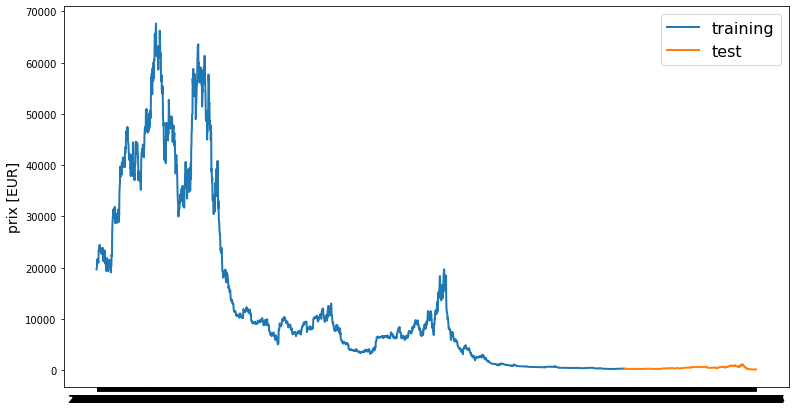

In [17]:
from matplotlib import pyplot as plt
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('prix [EUR]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train['Close'], test['Close'], 'training', 'test', title='')

In [18]:
train_size = int(len(datacrypto) * 0.70)
test_size = len(datacrypto) - train_size
train = datacrypto[0:train_size:]
test = datacrypto[train_size:len(datacrypto):]
print("train size: {}, test size: {} ".format(len(train), len(test)))


train size: 2243, test size: 962 


In [19]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1
def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

In [20]:
normalise_zero_base(datacrypto)
normalise_min_max(datacrypto)

,Marketcap,Volume,Open,Close
Date,,,,
2022-08-28,0.299323,0.136747,0.295537,0.289451
2022-08-27,0.302004,0.195147,0.298515,0.295537
2022-08-26,0.322851,0.149630,0.318472,0.298515
2022-08-25,0.319453,0.150122,0.315168,0.318472
2022-08-24,0.321673,0.163958,0.317642,0.315168
...,...,...,...,...
2013-09-28,0.000098,0.000000,0.000161,0.000255
2013-09-27,0.000078,0.000000,0.000130,0.000161
2013-09-26,0.000042,0.000000,0.000073,0.000130


In [21]:
import numpy as np
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [22]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

In [23]:
''' code de classe 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



X=dataset[:-1]
Y=dataset[1:]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

X_train=np.array(X_train).reshape(X_train.shape[0],1,1)
testX = np.reshape(X_test, (X_test.shape[0],1, 1))

 '''

' code de classe \n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range=(0, 1))\ndataset = scaler.fit_transform(dataset)\n\n\n\nX=dataset[:-1]\nY=dataset[1:]\n\nX_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)\n\nX_train=np.array(X_train).reshape(X_train.shape[0],1,1)\ntestX = np.reshape(X_test, (X_test.shape[0],1, 1))\n\n '

In [24]:
from tensorflow.python import metrics
from keras.layers import LSTM,Activation,Dense,Dropout,Input
from keras.models import Sequential
from keras.layers import Embedding
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer,metrics=["mae"])
    return model

In [25]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [26]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    datacrypto, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
80/80 [==============================] - 4s 15ms/step - loss: 0.0032 - mae: 0.0384
Epoch 2/20
80/80 [==============================] - 1s 13ms/step - loss: 0.0014 - mae: 0.0263
Epoch 3/20
80/80 [==============================] - 1s 14ms/step - loss: 9.8159e-04 - mae: 0.0210
Epoch 4/20
80/80 [==============================] - 1s 16ms/step - loss: 7.2306e-04 - mae: 0.0170
Epoch 5/20
80/80 [==============================] - 1s 16ms/step - loss: 9.2602e-04 - mae: 0.0157
Epoch 6/20
80/80 [==============================] - 1s 13ms/step - loss: 4.4322e-04 - mae: 0.0120
Epoch 7/20
80/80 [==============================] - 1s 11ms/step - loss: 7.9534e-04 - mae: 0.0137
Epoch 8/20
80/80 [==============================] - 1s 13ms/step - loss: 3.8931e-04 - mae: 0.0097
Epoch 9/20
80/80 [==============================] - 1s 14ms/step - loss: 3.7651e-04 - mae: 0.0090
Epoch 10/20
80/80 [==============================] - 1s 12ms/step - loss: 3.1492e-04 - mae: 0.0084
Epoch 11/20
80/80 [========

In [27]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
from sklearn.metrics import mean_absolute_error
targets = test[target_col][window_len:]
predss = model.predict(X_test).squeeze()
y_test = np.nan_to_num(y_test)
predss = np.nan_to_num(predss)
mean_absolute_error(predss, y_test)

20/20 [==============================] - 1s 3ms/step


0.026088801845813577

In [29]:
predss

array([-3.22255306e-02, -5.53519540e-02, -4.18781005e-02, -4.34904546e-02,
       -2.83731688e-02, -1.14875985e-02, -2.65307818e-02, -1.74284037e-02,
       -5.98771460e-02, -7.88165405e-02, -6.19190969e-02, -2.01893970e-02,
       -1.25145391e-02,  5.50638000e-03,  9.55879223e-03,  9.91070736e-03,
        1.76815428e-02,  7.58716138e-03,  2.71073822e-02, -3.22335511e-02,
       -3.93743701e-02, -6.63550049e-02, -7.21896812e-02, -8.31474066e-02,
       -3.50982025e-02, -1.77367944e-02, -1.60012282e-02, -2.79054195e-02,
       -2.98501663e-02, -2.75094714e-02, -2.32458897e-02,  1.02630118e-02,
       -8.31026305e-03,  2.09535230e-02,  3.88656482e-02,  4.92388271e-02,
        5.05823866e-02,  6.03490435e-02,  3.28057408e-02,  1.59675237e-02,
        1.64625850e-02,  6.65741088e-03,  1.64236631e-02, -9.75767430e-03,
       -1.68340262e-02, -4.04259823e-02, -2.91564111e-02, -2.02347264e-02,
        1.46817730e-03,  1.23361126e-02,  2.13017985e-02,  1.54584441e-02,
        2.39278320e-02,  

In [30]:
X_test = np.nan_to_num(X_test)
scores = model.evaluate(X_test, y_test)
scores

20/20 [==============================] - 1s 3ms/step - loss: 3.4123e-04 - mae: 0.0057


[0.00034123013028874993, 0.005675222724676132]

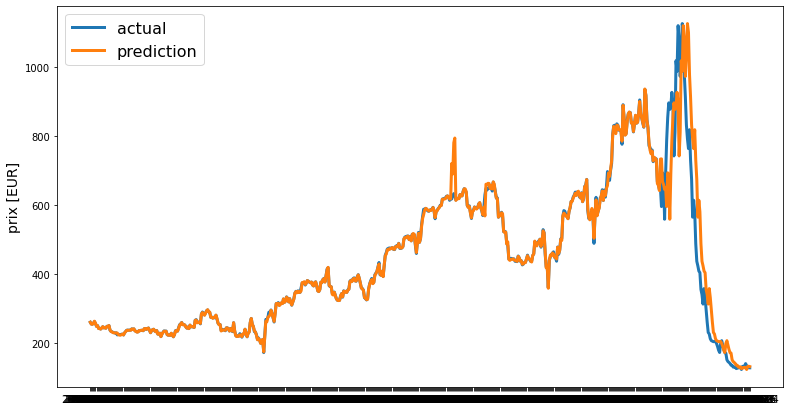

In [31]:
preds = test[target_col].values[:-window_len] * (predss + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

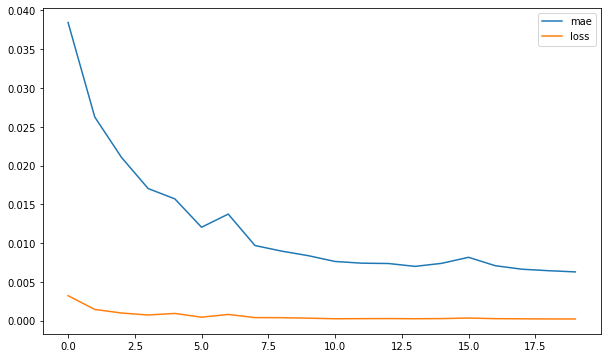

In [32]:
# plot MAE and loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

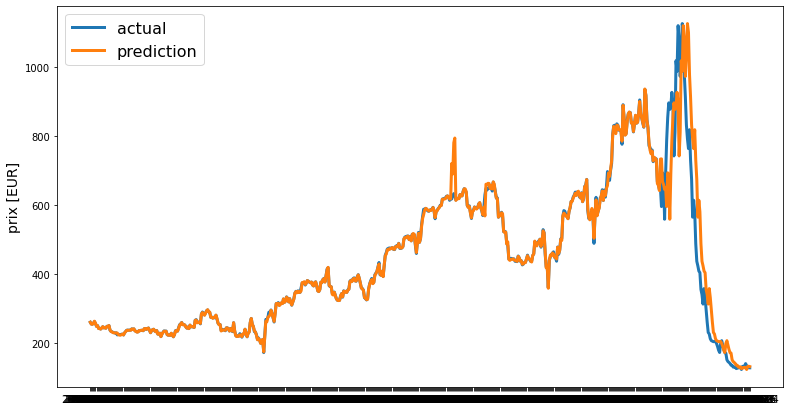

In [33]:
preds = test[target_col].values[:-window_len] * (predss + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [34]:
preds

Date
2015-07-03    260.224872
2015-07-02    254.686555
2015-07-01    254.266389
2015-06-30    256.918460
2015-06-29    263.349733
                 ...    
2013-09-28    128.260000
2013-09-27    123.070000
2013-09-26    132.040000
2013-09-25    132.550000
2013-09-24    131.650000
Length: 636, dtype: float64

In [35]:
from keras.layers import Bidirectional
def build_bilstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2]))))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer,metrics=["mae"])
    return model

In [36]:
model1 = build_bilstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history1 = model1.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
80/80 [==============================] - 7s 21ms/step - loss: 0.0032 - mae: 0.0382
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.0017 - mae: 0.0274
Epoch 3/20
80/80 [==============================] - 1s 9ms/step - loss: 0.0014 - mae: 0.0231
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 7.1165e-04 - mae: 0.0173
Epoch 5/20
80/80 [==============================] - 1s 8ms/step - loss: 6.1103e-04 - mae: 0.0151
Epoch 6/20
80/80 [==============================] - 1s 9ms/step - loss: 0.0010 - mae: 0.0170
Epoch 7/20
80/80 [==============================] - 1s 8ms/step - loss: 7.1807e-04 - mae: 0.0138
Epoch 8/20
80/80 [==============================] - 1s 8ms/step - loss: 3.7446e-04 - mae: 0.0107
Epoch 9/20
80/80 [==============================] - 1s 9ms/step - loss: 3.8588e-04 - mae: 0.0100
Epoch 10/20
80/80 [==============================] - 1s 10ms/step - loss: 4.0782e-04 - mae: 0.0100
Epoch 11/20
80/80 [========================

In [37]:
scores1 = model1.evaluate(X_test, y_test)
scores1

20/20 [==============================] - 1s 3ms/step - loss: 1.3777e-04 - mae: 0.0047


[0.0001377745356876403, 0.004658883903175592]

In [38]:
from keras.layers import GRU,BatchNormalization
def build_gru_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(GRU(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer,metrics=["mae"])
    return model

In [39]:
model2 = build_bilstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history2 = model2.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
80/80 [==============================] - 6s 8ms/step - loss: 0.0038 - mae: 0.0393
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.0018 - mae: 0.0291
Epoch 3/20
80/80 [==============================] - 1s 10ms/step - loss: 0.0014 - mae: 0.0244
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 7.4149e-04 - mae: 0.0178
Epoch 5/20
80/80 [==============================] - 1s 9ms/step - loss: 7.2094e-04 - mae: 0.0158
Epoch 6/20
80/80 [==============================] - 1s 10ms/step - loss: 8.0933e-04 - mae: 0.0146
Epoch 7/20
80/80 [==============================] - 1s 10ms/step - loss: 7.1393e-04 - mae: 0.0153
Epoch 8/20
80/80 [==============================] - 1s 10ms/step - loss: 4.4684e-04 - mae: 0.0118
Epoch 9/20
80/80 [==============================] - 1s 16ms/step - loss: 4.5745e-04 - mae: 0.0105
Epoch 10/20
80/80 [==============================] - 1s 18ms/step - loss: 2.8799e-04 - mae: 0.0085
Epoch 11/20
80/80 [================

In [40]:
scores2 = model2.evaluate(X_test, y_test)
scores2

20/20 [==============================] - 1s 4ms/step - loss: 1.7217e-04 - mae: 0.0076


[0.00017217491404153407, 0.00762637285515666]

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape


20/20 [==============================] - 0s 7ms/step


((2559, 1), (636, 1))

In [43]:
### Lets Do the prediction and check performance metrics BILSTM
train_predict1=model1.predict(X_train)
test_predict1=model1.predict(X_test)
train_predict1.shape, test_predict1.shape

20/20 [==============================] - 0s 3ms/step


((2559, 1), (636, 1))

In [44]:
### Lets Do the prediction and check performance metrics GRU
train_predict2=model2.predict(X_train)
test_predict2=model2.predict(X_test)
train_predict2.shape, test_predict2.shape

20/20 [==============================] - 0s 3ms/step


((2559, 1), (636, 1))

In [45]:
# Lets First Take all the Close Price 
closedf = datacrypto[['Close']]
print("Shape of close dataframe:", closedf.shape)
closedf

Shape of close dataframe: (3205, 1)


,Close
Date,
2022-08-28,19659.25
2022-08-27,20070.00
2022-08-26,20271.00
2022-08-25,21618.00
2022-08-24,21395.00
...,...
2013-09-28,140.28
2013-09-27,133.93
2013-09-26,131.84


In [46]:
import plotly.express as px
fig = px.line(closedf, x=closedf.index, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [47]:
# Transform back to original form
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))
# deleting date column and normalizing using MinMax Scaler
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

(3205, 1)


In [48]:
import math
from sklearn.metrics import mean_squared_error
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  882.6543167823238
Train data MSE:  779078.6429344709
Train data MAE:  256.28022207970946
-------------------------------------------------------------------------------------
Test data RMSE:  1246.7761117314517
Test data MSE:  1554450.6727841971
Test data MAE:  383.04308176558686


In [49]:
#explained variance LSTM
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.9789181963573449
Test data explained variance regression score: 0.970835580288607


In [50]:
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))



Train data R2 score: 0.9787520148610666
Test data R2 score: 0.9708083303111589


In [51]:
#explained variance BLSTM
train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict1))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict1))

Train data explained variance regression score: 0.9800459207007617
Test data explained variance regression score: 0.9883124411716971


In [52]:
#R2 BLSTM
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict1))
print("Test data R2 score:", r2_score(original_ytest, test_predict1))


Train data R2 score: 0.9798717012941546
Test data R2 score: 0.9882136245614813


In [53]:
#explained variance GRU
train_predict2 = scaler.inverse_transform(train_predict2)
test_predict2 = scaler.inverse_transform(test_predict2)
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict2))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict2))

Train data explained variance regression score: 0.9746459711279728
Test data explained variance regression score: 0.9855197118179361


In [54]:
#R2 GRU
from sklearn.metrics import r2_score
print("Train data R2 score:", r2_score(original_ytrain, train_predict2))
print("Test data R2 score:", r2_score(original_ytest, test_predict2))

Train data R2 score: 0.9746280554356013
Test data R2 score: 0.9852707250777137


In [55]:
time_step=15
pred_days = 30
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [56]:
from itertools import cycle
import plotly.express as px
pred_days = 30

temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(preds).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

myInt = 1000
new_pred_plot['next_predicted_days_value'] = [x / myInt for x in new_pred_plot['next_predicted_days_value']]
new_pred_plot['last_original_days_value'] = [x / myInt for x in new_pred_plot['last_original_days_value']]
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [57]:
new_pred_plot

,last_original_days_value,next_predicted_days_value
0,0.130900,0.130900
1,0.125720,0.125720
2,0.128380,0.128380
3,0.127560,0.127560
4,0.129570,0.129570
...,...,...
647,8656.894532,8656.894532
648,8306.601035,8306.601035
649,8912.021587,8912.021587
650,8946.443492,8946.443492


In [58]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(preds).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

myInt = 1000
lstmdf = [x / myInt for x in lstmdf]
names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [59]:
ff=scaler.inverse_transform(np.array(preds).reshape(-1,1)).reshape(1,-1).tolist()[0]
ff =  [abs(ele) for ele in ff]
myInt = 1000
ff = [x / myInt for x in ff]
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

#2569
fig = px.line(datacrypto,x=datacrypto.index[:636], y=ff, labels={'y':'Close price','x': 'Date'})
fig.update_layout(title_text=' predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [60]:
ff.sort()
ff

[8306.601035099999,
 8485.4599496,
 8609.6487808,
 8656.894531799999,
 8664.993803399999,
 8745.311580099999,
 8752.7359124,
 8792.5573311,
 8835.078507,
 8885.6989545,
 8912.021587199999,
 8946.4434915,
 9135.426495499998,
 9144.200706399997,
 9481.670356399998,
 9692.9263573,
 9864.3609395,
 10214.654436199999,
 11508.513074299999,
 11609.753969299998,
 11641.476116399997,
 11752.0859480863,
 12078.836782800001,
 12244.196911299998,
 12812.495801899999,
 13056.823828499999,
 13401.0428715,
 13417.916354,
 13430.816859493327,
 13760.785518399998,
 13782.383575999998,
 13795.207422699998,
 13853.927141799997,
 13915.754467278903,
 13956.517915399998,
 13963.942247699999,
 14072.570662980266,
 14122.38496993162,
 14200.830507583652,
 14339.208498499998,
 14408.170550421146,
 14729.044889182305,
 14732.240762018515,
 14742.41504773771,
 14752.182187248585,
 14759.45503168083,
 14805.72988270762,
 14875.31446653439,
 14892.109847449654,
 14936.94855105604,
 14998.629008142194,
 15014.5213

In [61]:
import joblib 
filename='modelbtc.sav'  
joblib.dump(model, filename) 

['modelbtc.sav']

In [62]:
model.save( '/content/modelbitcoin.sav',save_format="h5")

In [63]:
datacrypto.to_csv("databtc.csv")

In [64]:
d=pd.read_csv('/content/databtc.csv')
d=d.set_index('Date')
d.dropna(inplace=True)
d1=normalise_zero_base(d)
d1=normalise_min_max(d)
d1=extract_window_data(d, window_len, zero_base)
d1

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 8.92260095e-03,  4.27070052e-01,  1.00149477e-02,
          2.08934725e-02],
        [ 7.83052178e-02,  9.42127478e-02,  7.71300448e-02,
          3.11176673e-02],
        [ 6.69957170e-02,  9.78074794e-02,  6.60189337e-02,
          9.96350319e-02],
        [ 7.43834672e-02,  1.98987820e-01,  7.43398107e-02,
          8.82917710e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 6.87690183e-02, -2.33245245e-01,  6.64496078e-02,
          1.00149477e-02],
        [ 5.75595352e-02, -2.30726286e-01,  5.54486705e-02,
          7.71300448e-02],
        [ 6.48819505e-02, -1.59825533e-01,  6.36870406e-02,
          6.60189337e-02],
        [ 5.47344978e-02, -1.73408455e-01,  5.51033496e-02,
          7.43398107e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-1.04882186e-02,  3.28522179e-

In [65]:
from keras import models
m=models.load_model('/content/modelbitcoin.sav')
o1=m.predict(d1).squeeze()
o1 = np.nan_to_num(o1)
d1=np.nan_to_num(d1)

100/100 [==============================] - 1s 3ms/step


In [66]:
o = d[target_col].values[:-window_len] * (o1 + 1)
o

array([21489.90019676, 21345.46276331, 21562.54946601, ...,
         132.04      ,   132.55      ,   131.65      ])

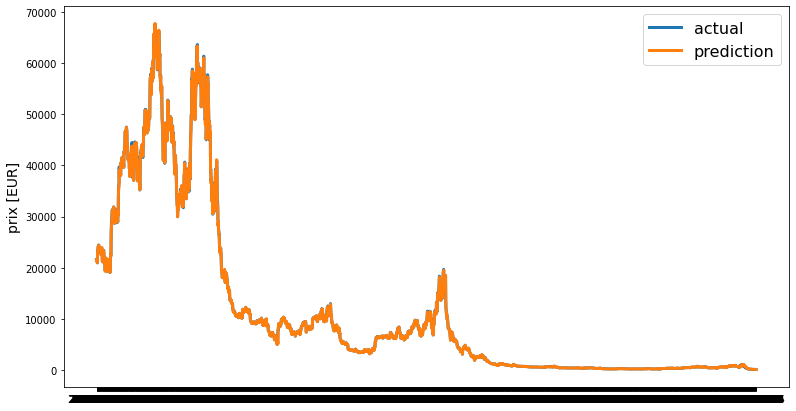

In [67]:
o = d[target_col].values[:-window_len] * (o1 + 1)
o = pd.Series(index=d.index[5:], data=o)
line_plot(d[target_col][window_len:], o, 'actual', 'prediction', lw=3)

In [68]:
#2569
fig = px.line(d,x=d.index[5:], y=o, labels={'y':'Close price','x': 'Date'})
fig.show()

In [69]:
o

Date
2022-08-23    21489.900197
2022-08-22    21345.462763
2022-08-21    21562.549466
2022-08-20    21171.594112
2022-08-19    20959.302307
                  ...     
2013-09-28      128.260000
2013-09-27      123.070000
2013-09-26      132.040000
2013-09-25      132.550000
2013-09-24      131.650000
Length: 3200, dtype: float64

In [70]:
type(o)

pandas.core.series.Series